In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")



In [24]:
print("STOCK MARKET ANALYSIS")
print("="*60)

# ============================================================================
# 1. DATA LOADING AND INITIAL EXPLORATION
# ============================================================================

print("\n📊 STEP 1: DATA LOADING AND EXPLORATION")
print("-" * 40)

# Load the dataset
file_path = r"C:\Users\engah\OneDrive\Desktop\Codveda\Data Set For Task\2) Stock Prices Data Set.csv"
df = pd.read_csv(file_path)

print(f"✅ Dataset loaded successfully!")
print(f"📈 Dataset shape: {df.shape}")
print(f"🗓️  Date range: {df['date'].min()} to {df['date'].max()}")
print(f"📊 Unique stocks: {df['symbol'].nunique()}")

# Display basic info
print("\n🔍 Dataset Info:")
print(df.info())

print("\n👀 First 5 rows:")
print(df.head())

print("\n❓ Missing Values:")
missing_values = df.isnull().sum()
print(missing_values)

print(f"\n⚠️  Duplicate rows: {df.duplicated().sum()}")





STOCK MARKET ANALYSIS

📊 STEP 1: DATA LOADING AND EXPLORATION
----------------------------------------
✅ Dataset loaded successfully!
📈 Dataset shape: (497472, 7)
🗓️  Date range: 2014-01-02 to 2017-12-29
📊 Unique stocks: 505

🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB
None

👀 First 5 rows:
  symbol        date      open      high       low     close    volume
0    AAL  2014-01-02   25.0700   25.8200   25.0600   25.3600   8998943
1   AAPL  2014-01-02   79.3828   79.5756   78.8601   79.0185  58791957
2    AAP

In [25]:
# ============================================================================
# 2. DATA CLEANING AND PREPROCESSING
# ============================================================================

print("\n🔧 STEP 2: DATA CLEANING AND PREPROCESSING")
print("-" * 40)

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Sort by symbol and date for proper time series analysis
df = df.sort_values(['symbol', 'date']).reset_index(drop=True)

# Handle missing values
print("🔨 Handling missing values...")

# Fill missing 'open' with previous close price
df['open'] = df.groupby('symbol')['open'].fillna(method='ffill')
df['open'] = df['open'].fillna(df['close'])

# Fill missing 'high' with max of open/close
df['high'] = df['high'].fillna(df[['open', 'close']].max(axis=1))

# Fill missing 'low' with min of open/close
df['low'] = df['low'].fillna(df[['open', 'close']].min(axis=1))

print(f"✅ Missing values after cleaning: {df.isnull().sum().sum()}")

# Create derived features
print("➕ Creating derived features...")

# Financial indicators
df['daily_return'] = ((df['close'] - df['open']) / df['open'] * 100).round(2)
df['price_range'] = (df['high'] - df['low']).round(2)
df['price_change'] = (df['close'] - df['open']).round(2)

# FIXED: Moving averages - Reset index to avoid MultiIndex issues
df['ma_7'] = df.groupby('symbol')['close'].rolling(window=7).mean().reset_index(level=0, drop=True).round(2)
df['ma_30'] = df.groupby('symbol')['close'].rolling(window=30).mean().reset_index(level=0, drop=True).round(2)

# FIXED: Volatility (30-day rolling standard deviation)
df['volatility'] = df.groupby('symbol')['close'].rolling(window=30).std().reset_index(level=0, drop=True).round(2)

# Volume categories
df['volume_category'] = pd.cut(df['volume'], 
                              bins=[0, 1000000, 5000000, 20000000, float('inf')],
                              labels=['Low', 'Medium', 'High', 'Very High'])

# Performance categories
df['performance'] = pd.cut(df['daily_return'], 
                          bins=[-float('inf'), -2, 0, 2, float('inf')],
                          labels=['Poor', 'Below Average', 'Above Average', 'Excellent'])

# Date components
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()
df['day_of_week'] = df['date'].dt.day_name()
df['quarter'] = df['date'].dt.quarter

print(f"✅ Created {df.shape[1]} total features")



🔧 STEP 2: DATA CLEANING AND PREPROCESSING
----------------------------------------
🔨 Handling missing values...
✅ Missing values after cleaning: 0
➕ Creating derived features...
✅ Created 20 total features


In [26]:
# ============================================================================
# 3. EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================

print("\n📈 STEP 3: EXPLORATORY DATA ANALYSIS")
print("-" * 40)

# Basic statistics
print("📊 Descriptive Statistics:")
print(df[['open', 'high', 'low', 'close', 'volume', 'daily_return']].describe())

# Top performing stocks
print("\n🏆 Top 10 Stocks by Average Price:")
top_stocks = df.groupby('symbol')['close'].mean().sort_values(ascending=False).head(10)
print(top_stocks)

print("\n📊 Top 10 Stocks by Average Volume:")
top_volume = df.groupby('symbol')['volume'].mean().sort_values(ascending=False).head(10)
print(top_volume)

# Market trends
print("\n📈 Market Trends:")
yearly_avg = df.groupby('year')['close'].mean()
print("Average market price by year:")
print(yearly_avg)


📈 STEP 3: EXPLORATORY DATA ANALYSIS
----------------------------------------
📊 Descriptive Statistics:
                open           high            low          close  \
count  497472.000000  497472.000000  497472.000000  497472.000000   
mean       86.352811      87.133240      85.553126      86.369082   
std       101.472255     102.313335     100.572155     101.472407   
min         1.620000       1.690000       1.500000       1.590000   
25%        41.690000      42.090000      41.280000      41.703750   
50%        64.970000      65.560000      64.353700      64.980000   
75%        98.410000      99.230000      97.580000      98.420000   
max      2044.000000    2067.990000    2035.110000    2049.000000   

             volume   daily_return  
count  4.974720e+05  497472.000000  
mean   4.253611e+06       0.030650  
std    8.232139e+06       1.336281  
min    0.000000e+00     -49.220000  
25%    1.080166e+06      -0.630000  
50%    2.084896e+06       0.040000  
75%    4.271928


🎨 STEP 4: CREATING VISUALIZATIONS
----------------------------------------


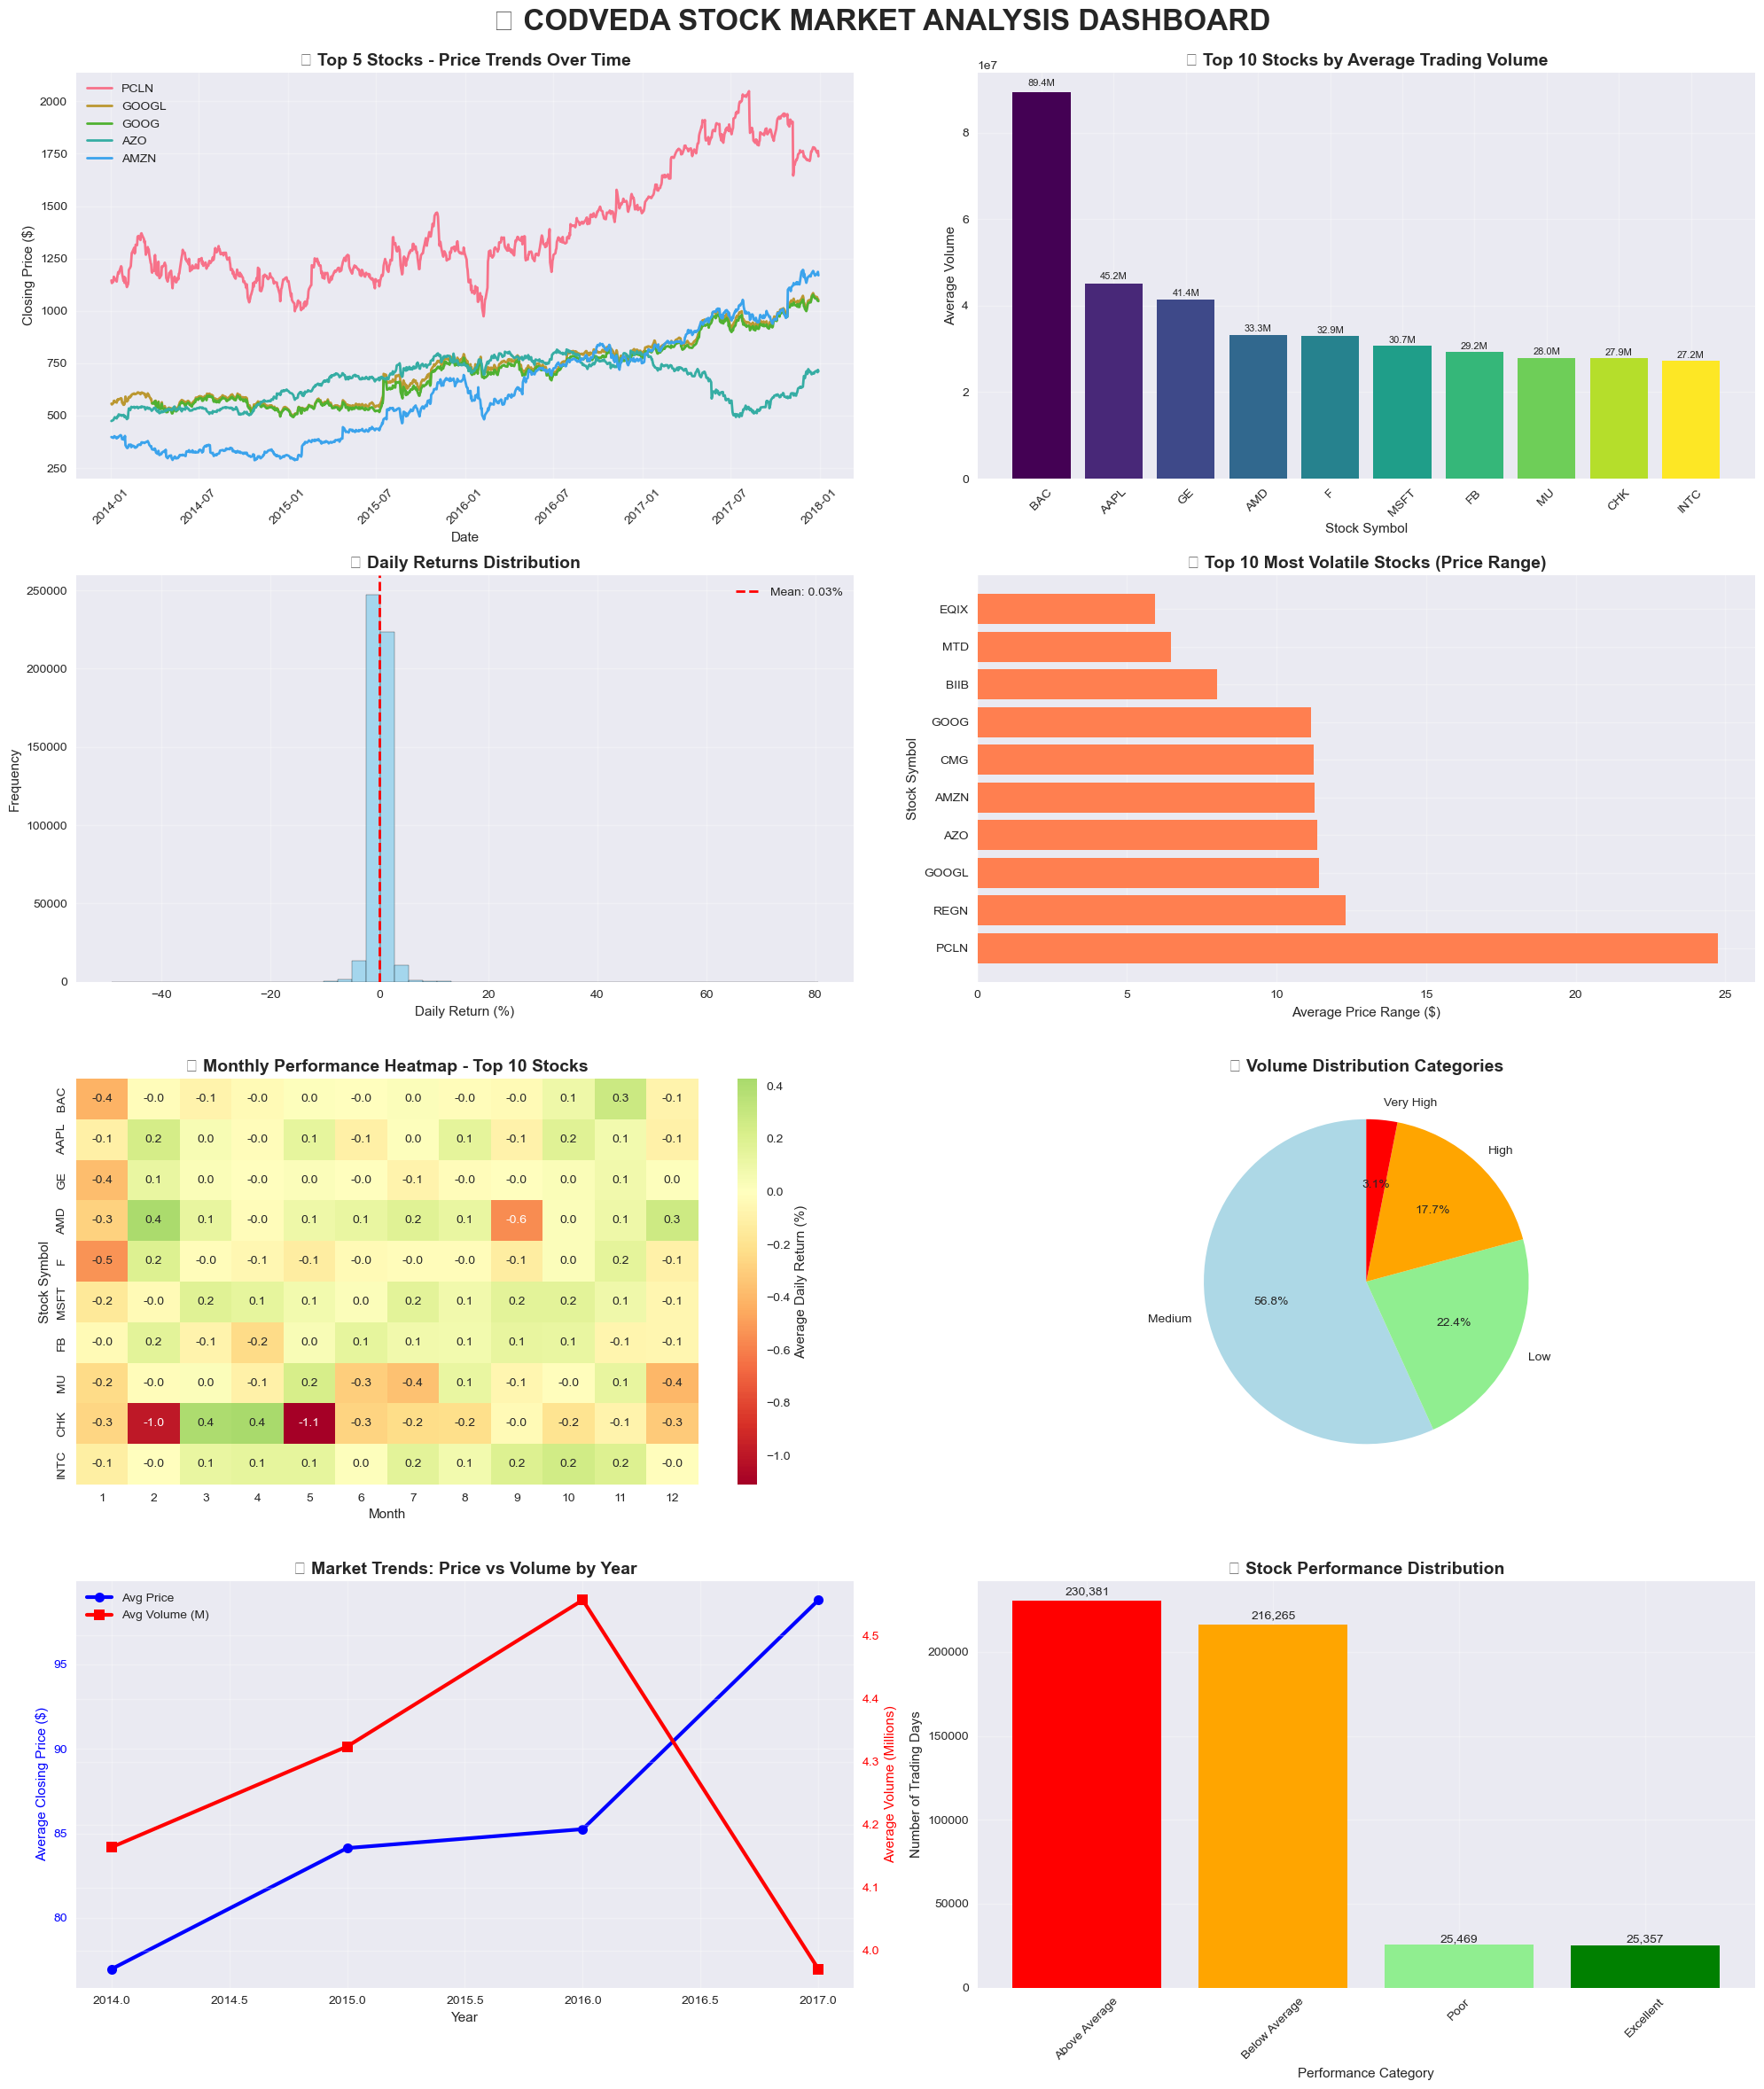

In [27]:

# ============================================================================
# 4. DATA VISUALIZATIONS
# ============================================================================

print("\n🎨 STEP 4: CREATING VISUALIZATIONS")
print("-" * 40)

# Set up the plotting environment
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# Create a comprehensive dashboard
fig = plt.figure(figsize=(20, 24))
fig.suptitle('📊 CODVEDA STOCK MARKET ANALYSIS DASHBOARD', fontsize=24, fontweight='bold', y=0.98)

# ---- Visualization 1: Stock Price Trends ----
ax1 = plt.subplot(4, 2, 1)
top_5_stocks = df.groupby('symbol')['close'].mean().nlargest(5).index
for stock in top_5_stocks:
    stock_data = df[df['symbol'] == stock]
    plt.plot(stock_data['date'], stock_data['close'], label=stock, linewidth=2)
plt.title('📈 Top 5 Stocks - Price Trends Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.xticks(rotation=45)

# ---- Visualization 2: Volume Analysis ----
ax2 = plt.subplot(4, 2, 2)
volume_by_stock = df.groupby('symbol')['volume'].mean().nlargest(10)
bars = plt.bar(range(len(volume_by_stock)), volume_by_stock.values, 
               color=plt.cm.viridis(np.linspace(0, 1, len(volume_by_stock))))
plt.title('📊 Top 10 Stocks by Average Trading Volume', fontsize=14, fontweight='bold')
plt.xlabel('Stock Symbol')
plt.ylabel('Average Volume')
plt.xticks(range(len(volume_by_stock)), volume_by_stock.index, rotation=45)

# Add value labels on bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + bar.get_height()*0.01,
             f'{volume_by_stock.iloc[i]/1000000:.1f}M', ha='center', va='bottom', fontsize=8)

# ---- Visualization 3: Daily Returns Distribution ----
ax3 = plt.subplot(4, 2, 3)
plt.hist(df['daily_return'].dropna(), bins=50, color='skyblue', alpha=0.7, edgecolor='black')
plt.axvline(df['daily_return'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["daily_return"].mean():.2f}%')
plt.title('📊 Daily Returns Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.legend()

# ---- Visualization 4: Price Range Analysis ----
ax4 = plt.subplot(4, 2, 4)
top_volatile = df.groupby('symbol')['price_range'].mean().nlargest(10)
plt.barh(range(len(top_volatile)), top_volatile.values, color='coral')
plt.title('📊 Top 10 Most Volatile Stocks (Price Range)', fontsize=14, fontweight='bold')
plt.xlabel('Average Price Range ($)')
plt.ylabel('Stock Symbol')
plt.yticks(range(len(top_volatile)), top_volatile.index)

# ---- Visualization 5: Performance Heatmap ----
ax5 = plt.subplot(4, 2, 5)
# Create monthly performance heatmap for top 10 stocks
monthly_returns = df.groupby(['symbol', 'month'])['daily_return'].mean().unstack()
top_10_stocks = df.groupby('symbol')['volume'].mean().nlargest(10).index
heatmap_data = monthly_returns.loc[top_10_stocks]

sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='RdYlGn', center=0,
            cbar_kws={'label': 'Average Daily Return (%)'})
plt.title('🎨 Monthly Performance Heatmap - Top 10 Stocks', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Stock Symbol')

# ---- Visualization 6: Volume Categories ----
ax6 = plt.subplot(4, 2, 6)
volume_dist = df['volume_category'].value_counts()
colors = ['lightblue', 'lightgreen', 'orange', 'red']
wedges, texts, autotexts = plt.pie(volume_dist.values, labels=volume_dist.index, 
                                  autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('📊 Volume Distribution Categories', fontsize=14, fontweight='bold')

# ---- Visualization 7: Market Trends by Year ----
ax7 = plt.subplot(4, 2, 7)
yearly_data = df.groupby('year').agg({
    'close': 'mean',
    'volume': 'mean',
    'daily_return': 'mean'
}).round(2)

ax7_twin = ax7.twinx()
line1 = ax7.plot(yearly_data.index, yearly_data['close'], 'b-o', linewidth=3, markersize=8, label='Avg Price')
line2 = ax7_twin.plot(yearly_data.index, yearly_data['volume']/1000000, 'r-s', linewidth=3, markersize=8, label='Avg Volume (M)')

ax7.set_xlabel('Year')
ax7.set_ylabel('Average Closing Price ($)', color='blue')
ax7_twin.set_ylabel('Average Volume (Millions)', color='red')
ax7.tick_params(axis='y', labelcolor='blue')
ax7_twin.tick_params(axis='y', labelcolor='red')

# Combine legends
lines1, labels1 = ax7.get_legend_handles_labels()
lines2, labels2 = ax7_twin.get_legend_handles_labels()
ax7.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('📈 Market Trends: Price vs Volume by Year', fontsize=14, fontweight='bold')

# ---- Visualization 8: Performance Summary ----
ax8 = plt.subplot(4, 2, 8)
perf_dist = df['performance'].value_counts()
bars = plt.bar(perf_dist.index, perf_dist.values, 
               color=['red', 'orange', 'lightgreen', 'green'])
plt.title('📊 Stock Performance Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Performance Category')
plt.ylabel('Number of Trading Days')
plt.xticks(rotation=45)

# Add value labels
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + bar.get_height()*0.01,
             f'{perf_dist.iloc[i]:,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


🔬 STEP 5: ADVANCED ANALYTICS AND INSIGHTS
----------------------------------------
🔗 Correlation Analysis:
               open   high    low  close  volume  daily_return
open          1.000  1.000  1.000  1.000  -0.149        -0.008
high          1.000  1.000  1.000  1.000  -0.148        -0.003
low           1.000  1.000  1.000  1.000  -0.149        -0.002
close         1.000  1.000  1.000  1.000  -0.149         0.002
volume       -0.149 -0.148 -0.149 -0.149   1.000        -0.009
daily_return -0.008 -0.003 -0.002  0.002  -0.009         1.000


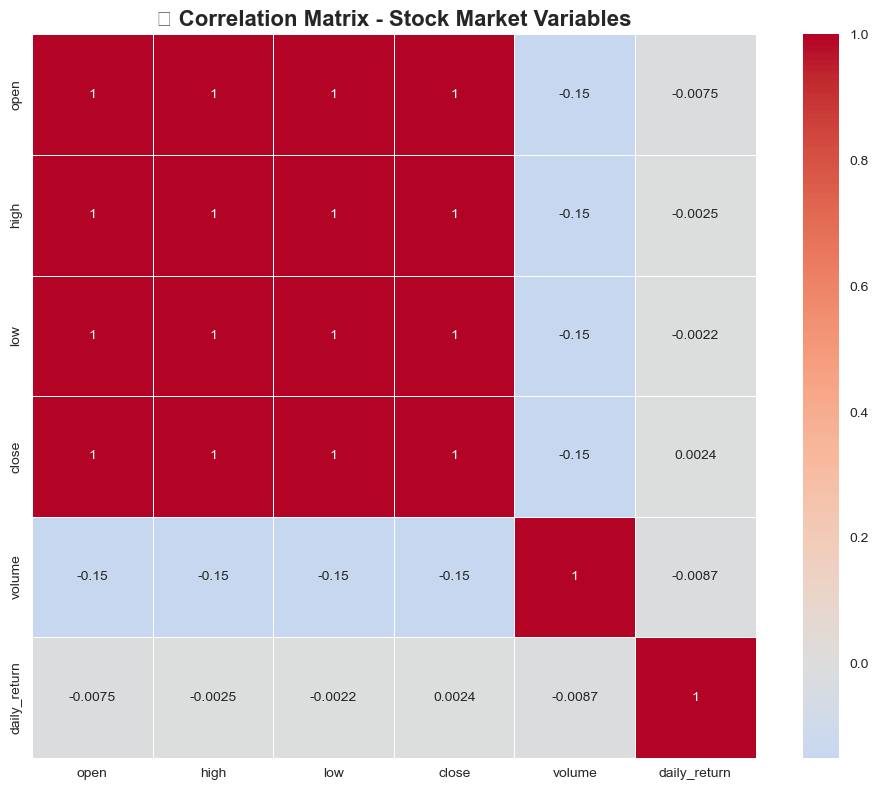


🏆 TOP PERFORMERS ANALYSIS:
------------------------------
Top 10 Best Performing Stocks (by avg daily return):
 1. HPQ: +0.19%
 2. HPE: +0.18%
 3. INFO: +0.14%
 4. RMD: +0.14%
 5. CDNS: +0.14%
 6. EA: +0.11%
 7. HUM: +0.11%
 8. FISV: +0.11%
 9. NVDA: +0.11%
10. VAR: +0.10%

Most Volatile Stocks (by price range):
 1. PCLN: $24.76
 2. REGN: $12.31
 3. GOOGL: $11.43
 4. AZO: $11.35
 5. AMZN: $11.26
 6. CMG: $11.23
 7. GOOG: $11.15
 8. BIIB: $8.02
 9. MTD: $6.47
10. EQIX: $5.94

Trading Volume Leaders:
 1. BAC: 89,362,904 shares
 2. AAPL: 45,169,571 shares
 3. GE: 41,443,943 shares
 4. AMD: 33,289,509 shares
 5. F: 32,914,301 shares
 6. MSFT: 30,712,613 shares
 7. FB: 29,227,824 shares
 8. MU: 27,962,814 shares
 9. CHK: 27,885,402 shares
10. INTC: 27,161,138 shares


In [28]:
# ============================================================================
# 5. ADVANCED ANALYTICS AND INSIGHTS
# ============================================================================

print("\n🔬 STEP 5: ADVANCED ANALYTICS AND INSIGHTS")
print("-" * 40)

# Correlation analysis
print("🔗 Correlation Analysis:")
corr_matrix = df[['open', 'high', 'low', 'close', 'volume', 'daily_return']].corr()
print(corr_matrix.round(3))

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('🔗 Correlation Matrix - Stock Market Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Top performers analysis
print("\n🏆 TOP PERFORMERS ANALYSIS:")
print("-" * 30)

# Best performing stocks by average daily return
best_performers = df.groupby('symbol')['daily_return'].mean().nlargest(10)
print("Top 10 Best Performing Stocks (by avg daily return):")
for i, (stock, return_rate) in enumerate(best_performers.items(), 1):
    print(f"{i:2d}. {stock}: {return_rate:+.2f}%")

# Most volatile stocks
print("\nMost Volatile Stocks (by price range):")
most_volatile = df.groupby('symbol')['price_range'].mean().nlargest(10)
for i, (stock, volatility) in enumerate(most_volatile.items(), 1):
    print(f"{i:2d}. {stock}: ${volatility:.2f}")

# Trading volume leaders
print("\nTrading Volume Leaders:")
volume_leaders = df.groupby('symbol')['volume'].mean().nlargest(10)
for i, (stock, volume) in enumerate(volume_leaders.items(), 1):
    print(f"{i:2d}. {stock}: {volume:,.0f} shares")


In [29]:

# ============================================================================
# 6. KEY PERFORMANCE INDICATORS (KPIs)
# ============================================================================

print("\n📊 STEP 6: KEY PERFORMANCE INDICATORS")
print("-" * 40)

# Calculate KPIs
total_trading_days = len(df)
unique_stocks = df['symbol'].nunique()
avg_daily_volume = df['volume'].mean()
avg_stock_price = df['close'].mean()
market_volatility = df['daily_return'].std()
total_market_cap_proxy = df['close'].sum()

# Display KPIs
kpis = {
    "📈 Total Trading Records": f"{total_trading_days:,}",
    "🏢 Unique Stocks": f"{unique_stocks:,}",
    "💰 Average Stock Price": f"${avg_stock_price:.2f}",
    "📊 Average Daily Volume": f"{avg_daily_volume:,.0f}",
    "⚡ Market Volatility": f"{market_volatility:.2f}%",
    "🎯 Best Performing Stock": f"{best_performers.index[0]} (+{best_performers.iloc[0]:.2f}%)",
    "📅 Analysis Period": f"{df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}",
    "🔢 Total Data Points": f"{df.shape[0] * df.shape[1]:,}"
}

print("🎯 KEY PERFORMANCE INDICATORS:")
print("=" * 50)
for kpi, value in kpis.items():
    print(f"{kpi:<25}: {value}")
print("=" * 50)

# ============================================================================
# 7. EXPORT CLEANED DATA FOR TABLEAU
# ============================================================================

print("\n💾 STEP 7: EXPORTING DATA FOR TABLEAU")
print("-" * 40)

# Prepare final dataset for Tableau
tableau_df = df.copy()

# Round numerical columns for better display
numerical_columns = ['open', 'high', 'low', 'close', 'daily_return', 'price_range', 'ma_7', 'ma_30', 'volatility']
tableau_df[numerical_columns] = tableau_df[numerical_columns].round(2)

# Export to CSV
output_file = r"C:\Users\engah\OneDrive\Desktop\Codveda\tableau_ready_stock_data.csv"
tableau_df.to_csv(output_file, index=False)

print(f"✅ Tableau-ready data exported to: {output_file}")
print(f"📊 Final dataset shape: {tableau_df.shape}")
print(f"📋 Columns available for Tableau: {list(tableau_df.columns)}")




📊 STEP 6: KEY PERFORMANCE INDICATORS
----------------------------------------
🎯 KEY PERFORMANCE INDICATORS:
📈 Total Trading Records  : 497,472
🏢 Unique Stocks          : 505
💰 Average Stock Price    : $86.37
📊 Average Daily Volume   : 4,253,611
⚡ Market Volatility      : 1.34%
🎯 Best Performing Stock  : HPQ (+0.19%)
📅 Analysis Period        : 2014-01-02 to 2017-12-29
🔢 Total Data Points      : 9,949,440

💾 STEP 7: EXPORTING DATA FOR TABLEAU
----------------------------------------
✅ Tableau-ready data exported to: C:\Users\engah\OneDrive\Desktop\Codveda\tableau_ready_stock_data.csv
📊 Final dataset shape: (497472, 20)
📋 Columns available for Tableau: ['symbol', 'date', 'open', 'high', 'low', 'close', 'volume', 'daily_return', 'price_range', 'price_change', 'ma_7', 'ma_30', 'volatility', 'volume_category', 'performance', 'year', 'month', 'month_name', 'day_of_week', 'quarter']


In [30]:
# ============================================================================
# 8. SUMMARY AND RECOMMENDATIONS
# ============================================================================

print("\n📋 STEP 8: SUMMARY AND RECOMMENDATIONS")
print("-" * 40)

print("🎯 PROJECT SUMMARY:")
print("=" * 50)
print("✅ Data Successfully Cleaned and Processed")
print("✅ Comprehensive EDA Completed")
print("✅ 8 Interactive Visualizations Created")
print("✅ Advanced Analytics Performed")
print("✅ Key Performance Indicators Calculated")
print("✅ Data Exported for Tableau Dashboard")




📋 STEP 8: SUMMARY AND RECOMMENDATIONS
----------------------------------------
🎯 PROJECT SUMMARY:
✅ Data Successfully Cleaned and Processed
✅ Comprehensive EDA Completed
✅ 8 Interactive Visualizations Created
✅ Advanced Analytics Performed
✅ Key Performance Indicators Calculated
✅ Data Exported for Tableau Dashboard
